In [39]:
print("Hello Wrold")

Hello Wrold


In [40]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


# Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px

In [42]:
df = pd.read_csv("Groceries_dataset.csv",encoding="windows-1251")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [43]:
df.shape

(38765, 3)

In [44]:
df.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

# Exploratory Data Analysis

In [45]:
groceries_time = pd.DataFrame(df.groupby('Date')['itemDescription'].nunique().index)
groceries_time['members_count'] = df.groupby('Date')['Member_number'].nunique().values
groceries_time['items_count'] = df.groupby('Date')['itemDescription'].nunique().values
groceries_time['items'] = df.groupby('Date')['itemDescription'].unique().values
groceries_time.set_index('Date',inplace=True)
groceries_time.head()

,members_count,items_count,items
Date,,,
01-01-2014,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
01-01-2015,16,34,"[canned beer, frozen meals, butter, ham, citru..."
01-02-2014,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
01-02-2015,20,31,"[whole milk, canned beer, bottled water, soda,..."
01-03-2014,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."


In [46]:
#Top 5 frequently sold products
print("Top 5 frequently sold products(Tabular Representation)")
x = df['itemDescription'].value_counts().sort_values(ascending=False)[:5]
x

Top 5 frequently sold products(Tabular Representation)


whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: itemDescription, dtype: int64

In [47]:
fig = px.bar(x= x.index, y= x.values)
fig.update_layout(title_text= "Top 5 frequently sold products (Graphical Representation)", xaxis_title= "Products", yaxis_title="Count")
fig.show()

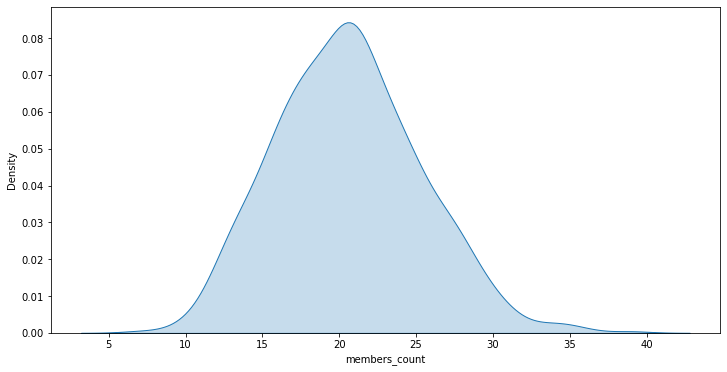

In [48]:
plt.rcParams["figure.figsize"] = [12, 6]

sns.kdeplot(data = groceries_time['members_count'],shade=True);

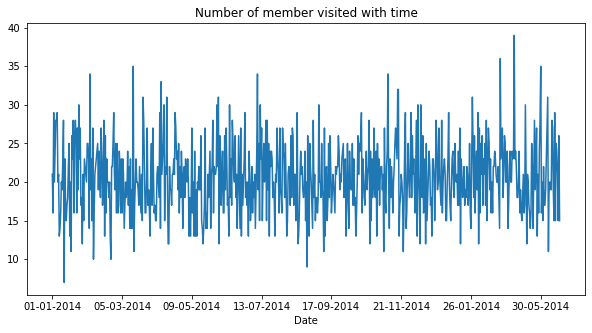

In [49]:
groceries_time['members_count'].plot(figsize=(10, 5),title='Number of member visited with time');

#  Apriori

In [50]:
!pip install apyori
from apyori import apriori

In [51]:
transactions = groceries_time['items'].tolist()


In [52]:
rules = apriori(transactions = transactions, min_support=0.00030, min_confidance=0.01, 
                min_lift=3, min_length=2, max_length=2)
#let's transform them into a list
results = list(rules)


In [53]:
def inspect(results):
    '''
    function to put the result in well organised pandas dataframe
    '''
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item #1', 'Item #2', 'Support', 'Confidence'
                                                               ,'Lift'])
resultsinDataFrame.head()

,Item #1,Item #2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667


In [54]:
resultsinDataFrame.nlargest(n=10, columns='Lift')

,Item #1,Item #2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333
